In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [7]:
df = pd.read_excel("vcc_edge_for_prediction.xlsx")


In [8]:
df.head()

Unnamed: 0                         website  \
0         851       http://www.infosysbpo.com   
1        1033              http://www.sap.com   
2         111    http://www.persistentsys.com   
3        1555             https://www.hpe.com   
4         621  http://www.sonata-software.com   

                                  companyName      companyType  foundedYear  \
0                            Infosys BPM Ltd.  Private Company       2002.0   
1                         SAP India Pvt. Ltd.  Private Company       1996.0   
2                     Persistent Systems Ltd.   Public Company       1990.0   
3  Hewlett Packard Enterprise India Pvt. Ltd.  Private Company       2015.0   
4          Sonata Information Technology Ltd.  Private Company       2000.0   

                                 businessDescription  employeeCount  \
0  Infosys BPM Ltd. (formerly known as Infosys BP...              9   
1  SAP India Pvt. Ltd. is engaged in providing bu...           2518   
2  Persistent Systems Ltd. is engaged in the deve...             20   
3  Hewlett Packard Enterprise India Pvt. Ltd. is ...              2   
4  Sonata Information Technology Ltd. is engaged ...              3   

  companyStatus  currentInvestorCount                sector  \
0    Subsidiary                   1.0  Enterprise Solutions   
1    Subsidiary                   1.0  Enterprise Solutions   
2     Operating                   1.0  Enterprise Solutions   
3    Subsidiary                   1.0  Enterprise Solutions   
4    Subsidiary                   1.0  Enterprise Solutions   

              industry                                   subIndustry  \
0  Enterprise Services  Business Process Outsourcing and IT Services   
1  Enterprise Services  Business Process Outsourcing and IT Services   
2  Enterprise Services  Business Process Outsourcing and IT Services   
3  Enterprise Services  Business Process Outsourcing and IT Services   
4  Enterprise Services  Business Process Outsourcing and IT Services   

                    category  \
0  Customer Support Services   
1                        NaN   
2           Managed Services   
3           Managed Services   
4           Managed Services   

                                        uniqueString country        state  \
0  Enterprise Solutions-Enterprise Services-Busin...   India    Karnataka   
1  Enterprise Solutions-Enterprise Services-Busin...   India    Karnataka   
2  Enterprise Solutions-Enterprise Services-Busin...   India  Maharashtra   
3  Enterprise Solutions-Enterprise Services-Busin...   India    Karnataka   
4  Enterprise Solutions-Enterprise Services-Busin...   India  Maharashtra   

        city    revenue  companyAge  
0  Bengaluru  974.16000        23.0  
1  Bengaluru  807.65220        29.0  
2       Pune  801.44436        35.0  
3  Bengaluru  744.89280        10.0  
4     Mumbai  721.77360        25.0

In [9]:
df.columns


Index(['Unnamed: 0', 'website', 'companyName', 'companyType', 'foundedYear',
       'businessDescription', 'employeeCount', 'companyStatus',
       'currentInvestorCount', 'sector', 'industry', 'subIndustry', 'category',
       'uniqueString', 'country', 'state', 'city', 'revenue', 'companyAge'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3059 entries, 0 to 3058
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3059 non-null   int64  
 1   website               2970 non-null   object 
 2   companyName           3059 non-null   object 
 3   companyType           3059 non-null   object 
 4   foundedYear           3057 non-null   float64
 5   businessDescription   3059 non-null   object 
 6   employeeCount         3059 non-null   int64  
 7   companyStatus         3059 non-null   object 
 8   currentInvestorCount  1071 non-null   float64
 9   sector                3059 non-null   object 
 10  industry              3059 non-null   object 
 11  subIndustry           3059 non-null   object 
 12  category              2442 non-null   object 
 13  uniqueString          3059 non-null   object 
 14  country               3059 non-null   object 
 15  state                

In [11]:
df.isna().sum().sort_values(ascending=False)

currentInvestorCount    1988
category                 617
website                   89
companyAge                 2
foundedYear                2
companyName                0
Unnamed: 0                 0
employeeCount              0
companyStatus              0
businessDescription        0
companyType                0
industry                   0
sector                     0
uniqueString               0
subIndustry                0
country                    0
state                      0
city                       0
revenue                    0
dtype: int64

In [7]:
(df.isna().mean() * 100).sort_values(ascending=False)


currentInvestorCount    64.988558
category                20.169990
website                  2.909448
companyAge               0.065381
foundedYear              0.065381
companyName              0.000000
Unnamed: 0               0.000000
employeeCount            0.000000
companyStatus            0.000000
businessDescription      0.000000
companyType              0.000000
industry                 0.000000
sector                   0.000000
uniqueString             0.000000
subIndustry              0.000000
country                  0.000000
state                    0.000000
city                     0.000000
revenue                  0.000000
dtype: float64

In [12]:
df.describe()


Unnamed: 0  foundedYear  employeeCount  currentInvestorCount  \
count  3059.000000  3057.000000    3059.000000           1071.000000   
mean   1529.000000  2007.191691     226.347499              2.428571   
std     883.201562     9.633800     584.861572              4.298259   
min       0.000000  1927.000000       1.000000              1.000000   
25%     764.500000  2001.000000       1.000000              1.000000   
50%    1529.000000  2009.000000      10.000000              1.000000   
75%    2293.500000  2015.000000     167.500000              1.000000   
max    3058.000000  2023.000000    4916.000000             40.000000   

           revenue   companyAge  
count  3059.000000  3057.000000  
mean     14.081435    17.808309  
std      53.378666     9.633800  
min       0.000000     2.000000  
25%       0.387622    10.000000  
50%       2.208720    16.000000  
75%       7.876355    24.000000  
max     974.160000    98.000000

In [13]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


Index(['website', 'companyName', 'companyType', 'businessDescription',
       'companyStatus', 'sector', 'industry', 'subIndustry', 'category',
       'uniqueString', 'country', 'state', 'city'],
      dtype='object')

In [14]:
df[categorical_cols].nunique().sort_values(ascending=False)


companyName            3059
businessDescription    3059
website                2955
city                    116
state                    24
uniqueString              7
companyStatus             5
category                  5
companyType               2
subIndustry               1
industry                  1
sector                    1
country                   1
dtype: int64

In [21]:
!python -m pip install --upgrade pip setuptools wheel


  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.2 MB/s eta 0:00:00a 0:00:01
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [23]:
!pip install ydata-profiling


In [26]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 10.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [ipywidgets]3 [ipywidgets]widgets]


In [28]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='My DataFrame Profile Report')


# Or save the report as an HTML file
profile.to_file("my_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 47.37it/s]


In [29]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]


In [30]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="employeeCount", y="revenue", data=df)
plt.title("Employee Count vs Revenue")
plt.xlabel("Employee Count")
plt.ylabel("Revenue")
plt.show()


/tmp/ipykernel_72889/446129467.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [31]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="employeeCount", y="revenue", data=df)
plt.title("Employee Count vs Revenue")
plt.savefig("employee_vs_revenue.png", bbox_inches="tight")
plt.close()


In [32]:

def create_revenue_relationship_plots(df, save_dir="plots"):
    import os
    os.makedirs(save_dir, exist_ok=True)

    # 1. Employee Count vs Revenue
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="employeeCount", y="revenue", data=df)
    plt.title("Employee Count vs Revenue")
    plt.savefig(f"{save_dir}/employeeCount_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 2. Company Age vs Revenue
    plt.figure(figsize=(6,4))
    sns.scatterplot(x="companyAge", y="revenue", data=df)
    plt.title("Company Age vs Revenue")
    plt.savefig(f"{save_dir}/companyAge_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 3. Company Type vs Revenue
    plt.figure(figsize=(5,4))
    sns.boxplot(x="companyType", y="revenue", data=df)
    plt.title("Revenue by Company Type")
    plt.savefig(f"{save_dir}/companyType_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 4. Category vs Revenue
    category_mean = df.groupby("category")["revenue"].mean().sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    category_mean.plot(kind="bar")
    plt.title("Average Revenue by Category")
    plt.ylabel("Revenue")
    plt.savefig(f"{save_dir}/category_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 5. City vs Revenue (Top 10 cities)
    top_cities = df["city"].value_counts().head(10).index
    city_mean = (
        df[df["city"].isin(top_cities)]
        .groupby("city")["revenue"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(7,4))
    city_mean.plot(kind="bar")
    plt.title("Average Revenue by City (Top 10)")
    plt.ylabel("Revenue")
    plt.savefig(f"{save_dir}/city_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 6. State vs Revenue
    state_mean = df.groupby("state")["revenue"].mean().sort_values(ascending=False)
    plt.figure(figsize=(7,4))
    state_mean.plot(kind="bar")
    plt.title("Average Revenue by State")
    plt.ylabel("Revenue")
    plt.savefig(f"{save_dir}/state_vs_revenue.png", bbox_inches="tight")
    plt.close()

    # 7. Correlation Heatmap (Numerical)
    numeric_cols = ["employeeCount", "companyAge", "revenue"]
    plt.figure(figsize=(5,4))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Matrix")
    plt.savefig(f"{save_dir}/correlation_matrix.png", bbox_inches="tight")
    plt.close()

    print(f"All plots saved successfully in '{save_dir}' folder.")


In [33]:
create_revenue_relationship_plots(df)


All plots saved successfully in 'plots' folder.


In [34]:
def select_required_columns(df):
    selected_cols = [
        "employeeCount",
        "companyAge",
        "companyType",
        "category",
        "city",
        "state",
        "revenue"
    ]
    return df[selected_cols].copy()


In [35]:
def handle_missing_values(df):
    # Numerical columns
    df["employeeCount"].fillna(df["employeeCount"].median(), inplace=True)
    df["companyAge"].fillna(df["companyAge"].median(), inplace=True)

    # Categorical columns
    categorical_cols = ["companyType", "category", "city", "state"]
    for col in categorical_cols:
        df[col].fillna("Unknown", inplace=True)

    return df


In [36]:
import numpy as np

def log_transform_columns(df):
    df["employeeCount_log"] = np.log1p(df["employeeCount"])
    df["revenue_log"] = np.log1p(df["revenue"])
    return df


In [37]:
def encode_categorical_features(df):
    df_encoded = pd.get_dummies(
        df,
        columns=["companyType", "category", "city", "state"],
        drop_first=True
    )
    return df_encoded


In [38]:
def split_features_target(df):
    X = df.drop(columns=["revenue", "revenue_log"])
    y = df["revenue_log"]
    return X, y


In [44]:
def reduce_city_cardinality(df, top_n=10):
    top_cities = df["city"].value_counts().head(top_n).index
    df["city"] = df["city"].apply(lambda x: x if x in top_cities else "Other")
    return df


In [41]:
from sklearn.model_selection import train_test_split

def train_test_split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )


In [45]:
def preprocess_data(df):
    df = select_required_columns(df)
    df = handle_missing_values(df)
    df = reduce_city_cardinality(df)
    df = log_transform_columns(df)
    df = encode_categorical_features(df)
    
    X, y = split_features_target(df)
    return train_test_split_data(X, y)


In [46]:
X_train, X_test, y_train, y_test = preprocess_data(df)


/tmp/ipykernel_72889/3518916159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["employeeCount"].fillna(df["employeeCount"].median(), inplace=True)
/tmp/ipykernel_72889/3518916159.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [47]:
X_train.head()

employeeCount  companyAge  employeeCount_log  \
2321              1        14.0           0.693147   
2031              2        23.0           1.098612   
1373              2        23.0           1.098612   
351               1        30.0           0.693147   
2917              1         8.0           0.693147   

      companyType_Public Company  category_Data Scraping and Processing  \
2321                       False                                  False   
2031                       False                                  False   
1373                       False                                  False   
351                        False                                  False   
2917                       False                                   True   

      category_Managed Services  category_Mobile App Development  \
2321                      False                            False   
2031                      False                            False   
1373                      False                            False   
351                       False                            False   
2917                      False                            False   

      category_Unknown  category_Website Development  city_Bengaluru  ...  \
2321              True                         False           False  ...   
2031              True                         False           False  ...   
1373              True                         False            True  ...   
351               True                         False            True  ...   
2917             False                         False           False  ...   

      state_Maharashtra  state_Odisha  state_Puducherry (UT)  state_Punjab  \
2321              False         False                  False          True   
2031              False         False                  False         False   
1373              False         False                  False         False   
351               False         False                  False         False   
2917              False         False                  False         False   

      state_Rajasthan  state_Tamil Nadu  state_Telangana  state_Uttar Pradesh  \
2321            False             False            False                False   
2031            False             False            False                False   
1373            False             False            False                False   
351             False             False            False                False   
2917             True             False            False                False   

      state_Uttarakhand  state_West Bengal  
2321              False              False  
2031              False              False  
1373              False              False  
351               False              False  
2917              False              False  

[5 rows x 42 columns]

In [48]:
X_train.astype(int)


employeeCount  companyAge  employeeCount_log  \
2321              1          14                  0   
2031              2          23                  1   
1373              2          23                  1   
351               1          30                  0   
2917              1           8                  0   
...             ...         ...                ...   
1638              5          31                  1   
1095              3          27                  1   
1130             93          41                  4   
1294            272           4                  5   
860             134          17                  4   

      companyType_Public Company  category_Data Scraping and Processing  \
2321                           0                                      0   
2031                           0                                      0   
1373                           0                                      0   
351                            0                                      0   
2917                           0                                      1   
...                          ...                                    ...   
1638                           0                                      0   
1095                           0                                      0   
1130                           0                                      0   
1294                           0                                      0   
860                            0                                      0   

      category_Managed Services  category_Mobile App Development  \
2321                          0                                0   
2031                          0                                0   
1373                          0                                0   
351                           0                                0   
2917                          0                                0   
...                         ...                              ...   
1638                          1                                0   
1095                          1                                0   
1130                          1                                0   
1294                          1                                0   
860                           1                                0   

      category_Unknown  category_Website Development  city_Bengaluru  ...  \
2321                 1                             0               0  ...   
2031                 1                             0               0  ...   
1373                 1                             0               1  ...   
351                  1                             0               1  ...   
2917                 0                             0               0  ...   
...                ...                           ...             ...  ...   
1638                 0                             0               0  ...   
1095                 0                             0               0  ...   
1130                 0                             0               0  ...   
1294                 0                             0               0  ...   
860                  0                             0               0  ...   

      state_Maharashtra  state_Odisha  state_Puducherry (UT)  state_Punjab  \
2321                  0             0                      0             1   
2031                  0             0                      0             0   
1373                  0             0                      0             0   
351                   0             0                      0             0   
2917                  0             0                      0             0   
...                 ...           ...                    ...           ...   
1638                  0             0                      0             0   
1095                  0             0                      0             0   
1130        

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [50]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Train_R2": r2_score(y_train, y_train_pred),
        "Test_R2": r2_score(y_test, y_test_pred),
        "Test_MAE": mean_absolute_error(y_test, y_test_pred),
        "Test_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred))
    }


In [51]:
def train_linear_regression(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    return model, metrics


In [52]:
def train_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    )
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    return model, metrics


In [53]:
def train_gradient_boosting(X_train, X_test, y_train, y_test):
    model = GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    )
    metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
    return model, metrics


In [54]:
results = []

lr_model, lr_metrics = train_linear_regression(X_train, X_test, y_train, y_test)
rf_model, rf_metrics = train_random_forest(X_train, X_test, y_train, y_test)
gb_model, gb_metrics = train_gradient_boosting(X_train, X_test, y_train, y_test)

results.append(("Linear Regression", lr_metrics))
results.append(("Random Forest", rf_metrics))
results.append(("Gradient Boosting", gb_metrics))

results_df = pd.DataFrame(
    [{**m, "Model": name} for name, m in results]
).set_index("Model")

results_df


Train_R2   Test_R2  Test_MAE  Test_RMSE
Model                                                     
Linear Regression  0.410461  0.404643  0.753117   1.042784
Random Forest      0.863179  0.357711  0.770598   1.083106
Gradient Boosting  0.531297  0.427928  0.727940   1.022188

### Hyperparamater tuning

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 50, 100]
}

ridge_search = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring="r2"
)

ridge_search.fit(X_train, y_train)

best_ridge = ridge_search.best_estimator_


In [57]:
best_ridge

Ridge(alpha=50)

In [58]:
ridge_metrics = evaluate_model(
    best_ridge, X_train, X_test, y_train, y_test
)

ridge_metrics


{'Train_R2': 0.4058815563718122,
 'Test_R2': 0.40737245668145017,
 'Test_MAE': 0.7531142739274587,
 'Test_RMSE': np.float64(1.0403909902005448)}

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso(max_iter=10000)

lasso_params = {
    "alpha": [0.001, 0.01, 0.1, 1, 10]
}

lasso_search = GridSearchCV(
    lasso,
    lasso_params,
    cv=5,
    scoring="r2"
)

lasso_search.fit(X_train, y_train)

best_lasso = lasso_search.best_estimator_
lasso_metrics = evaluate_model(
    best_lasso, X_train, X_test, y_train, y_test
)

lasso_metrics


{'Train_R2': 0.40768907697505663,
 'Test_R2': 0.4059339342036602,
 'Test_MAE': 0.753231602574221,
 'Test_RMSE': np.float64(1.041652928435477)}

In [60]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(max_iter=10000)

elastic_params = {
    "alpha": [0.001, 0.01, 0.1, 1],
    "l1_ratio": [0.2, 0.5, 0.8]
}

elastic_search = GridSearchCV(
    elastic,
    elastic_params,
    cv=5,
    scoring="r2"
)

elastic_search.fit(X_train, y_train)

best_elastic = elastic_search.best_estimator_


In [61]:
elastic_metrics = evaluate_model(
    best_elastic, X_train, X_test, y_train, y_test
)

elastic_metrics


{'Train_R2': 0.40532115577418915,
 'Test_R2': 0.4074779403848917,
 'Test_MAE': 0.7532775710776528,
 'Test_RMSE': np.float64(1.040298394792365)}

In [62]:
pd.DataFrame({
    "Linear": lr_metrics,
    "Ridge": ridge_metrics,
    "Lasso": lasso_metrics,
    "ElasticNet": elastic_metrics
}).T


Train_R2   Test_R2  Test_MAE  Test_RMSE
Linear      0.410461  0.404643  0.753117   1.042784
Ridge       0.405882  0.407372  0.753114   1.040391
Lasso       0.407689  0.405934  0.753232   1.041653
ElasticNet  0.405321  0.407478  0.753278   1.040298

## Hyper paramaetr tuning on 

Headcount-driven revenue logic

City tiering instead of raw cities

Revenue per employee signal

Log-scale modeling

KNN imputation

XGBoost as primary model

Business-aligned evaluation (RMSE, MAPE, R²

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

import xgboost as xgb


In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 2.4 MB/s  0:00:48m0:00:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 2.9 MB/s  0:01:23m0:00:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]


In [4]:
# Load your real dataset here
df = pd.read_excel("vcc_edge_for_prediction.xlsx")


In [5]:
TIER_1_CITIES = {
    "Bengaluru", "Bangalore", "Mumbai", "Delhi", "New Delhi",
    "Hyderabad", "Chennai", "Pune", "Gurgaon", "Noida"
}

def map_city_tier(city):
    if pd.isna(city):
        return "Unknown"
    return "Tier_1" if city in TIER_1_CITIES else "Tier_2_3"

df["city_tier"] = df["city"].apply(map_city_tier)


In [6]:
df["revenue_per_employee"] = df["revenue"] / df["employeeCount"]


In [7]:
df["tenure_index"] = df["companyAge"] / df["employeeCount"]


In [8]:
y = np.log1p(df["revenue"])

X = df[
    [
        "employeeCount",
        "companyAge",
        "revenue_per_employee",
        "tenure_index",
        "companyType",
        "category",
        "city_tier",
        "state"
    ]
]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
numerical_features = [
    "employeeCount",
    "companyAge",
    "revenue_per_employee",
    "tenure_index"
]

categorical_features = [
    "companyType",
    "category",
    "city_tier",
    "state"
]


In [11]:
numeric_pipeline = Pipeline([
    ("imputer", KNNImputer(n_neighbors=5)),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numerical_features),
    ("cat", categorical_pipeline, categorical_features)
])


In [12]:
xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])


In [13]:
param_grid = {
    "model__n_estimators": [300, 500],
    "model__learning_rate": [0.03, 0.05, 0.1],
    "model__max_depth": [3, 4, 5],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 500, 'model__subsample': 0.8}


In [14]:
# Predict (log scale)
y_pred_log = best_model.predict(X_test)

# Back to actual revenue
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mape = mean_absolute_percentage_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("===================================")
print(f"RMSE  : ${rmse:,.2f}")
print(f"MAPE  : {mape:.2%}")
print(f"R²    : {r2:.4f}")
print("===================================")


RMSE  : $17.71
MAPE  : 30.07%
R²    : 0.8842


In [15]:
feature_names = (
    numerical_features +
    list(
        best_model.named_steps["preprocessor"]
        .transformers_[1][1]
        .named_steps["encoder"]
        .get_feature_names_out(categorical_features)
    )
)

importances = best_model.named_steps["model"].feature_importances_

feature_importance_df = (
    pd.DataFrame({"Feature": feature_names, "Importance": importances})
    .sort_values("Importance", ascending=False)
)

print(feature_importance_df.head(10))


                                  Feature  Importance
2                    revenue_per_employee    0.525884
0                           employeeCount    0.441822
3                            tenure_index    0.011584
4             companyType_Private Company    0.002986
6      category_Customer Support Services    0.002213
35                    state_Uttar Pradesh    0.001620
7   category_Data Scraping and Processing    0.001602
28                      state_Maharashtra    0.001563
1                              companyAge    0.001508
33                       state_Tamil Nadu    0.001299


In [16]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_actual, y_pred)
print(f"MAE   : ${mae:,.2f}")


MAE   : $2.09


In [17]:
from sklearn.metrics import median_absolute_error

med_ae = median_absolute_error(y_actual, y_pred)
print(f"Median AE : ${med_ae:,.2f}")


Median AE : $0.08


### Sample

In [18]:
sample_company = pd.DataFrame([{
    "employeeCount": 250,
    "companyAge": 12,
    "revenue_per_employee": 1.8,   # can be estimated or historical avg
    "tenure_index": 12 / 250,
    "companyType": "Private Company",
    "category": "Managed Services",
    "city_tier": "Tier_1",
    "state": "Karnataka"
}])


In [19]:
# Predict log-revenue
predicted_log_revenue = best_model.predict(sample_company)

# Convert back to actual revenue
predicted_revenue = np.expm1(predicted_log_revenue)

print(f"Predicted Revenue: ${predicted_revenue[0]:,.2f}")


Predicted Revenue: $318.77


In [20]:
sample_companies = pd.DataFrame([
    {
        "employeeCount": 50,
        "companyAge": 5,
        "revenue_per_employee": 1.2,
        "tenure_index": 5 / 50,
        "companyType": "Private Company",
        "category": "Website Development",
        "city_tier": "Tier_2_3",
        "state": "Madhya Pradesh"
    },
    {
        "employeeCount": 1000,
        "companyAge": 25,
        "revenue_per_employee": 2.5,
        "tenure_index": 25 / 1000,
        "companyType": "Public Company",
        "category": "Managed Services",
        "city_tier": "Tier_1",
        "state": "Maharashtra"
    }
])

pred_log = best_model.predict(sample_companies)
pred_revenue = np.expm1(pred_log)

sample_companies["predicted_revenue"] = pred_revenue
sample_companies


employeeCount  companyAge  revenue_per_employee  tenure_index  \
0             50           5                   1.2         0.100   
1           1000          25                   2.5         0.025   

       companyType             category city_tier           state  \
0  Private Company  Website Development  Tier_2_3  Madhya Pradesh   
1   Public Company     Managed Services    Tier_1     Maharashtra   

   predicted_revenue  
0          66.335640  
1         649.491882

### SHAP Analysis

In [ ]:
# Extract trained preprocessor and model
preprocessor = best_model.named_steps["preprocessor"]
xgb_model = best_model.named_steps["model"]


11111

In [22]:
X_test_transformed = preprocessor.transform(X_test)


In [23]:
# Numeric feature names
num_features = [
    "employeeCount",
    "companyAge",
    "revenue_per_employee",
    "tenure_index"
]

# Categorical feature names after OneHotEncoding
cat_features = list(
    preprocessor
    .transformers_[1][1]
    .named_steps["encoder"]
    .get_feature_names_out(
        ["companyType", "category", "city_tier", "state"]
    )
)

feature_names = num_features + cat_features


In [27]:
import shap
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_transformed)


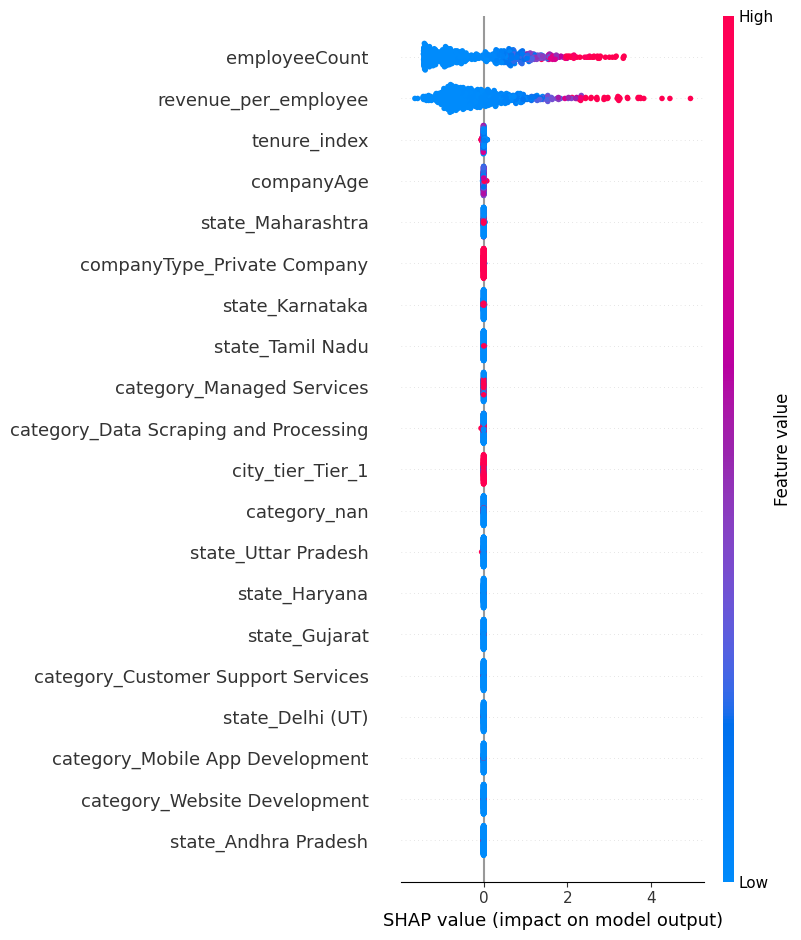

In [28]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names,
    show=True
)


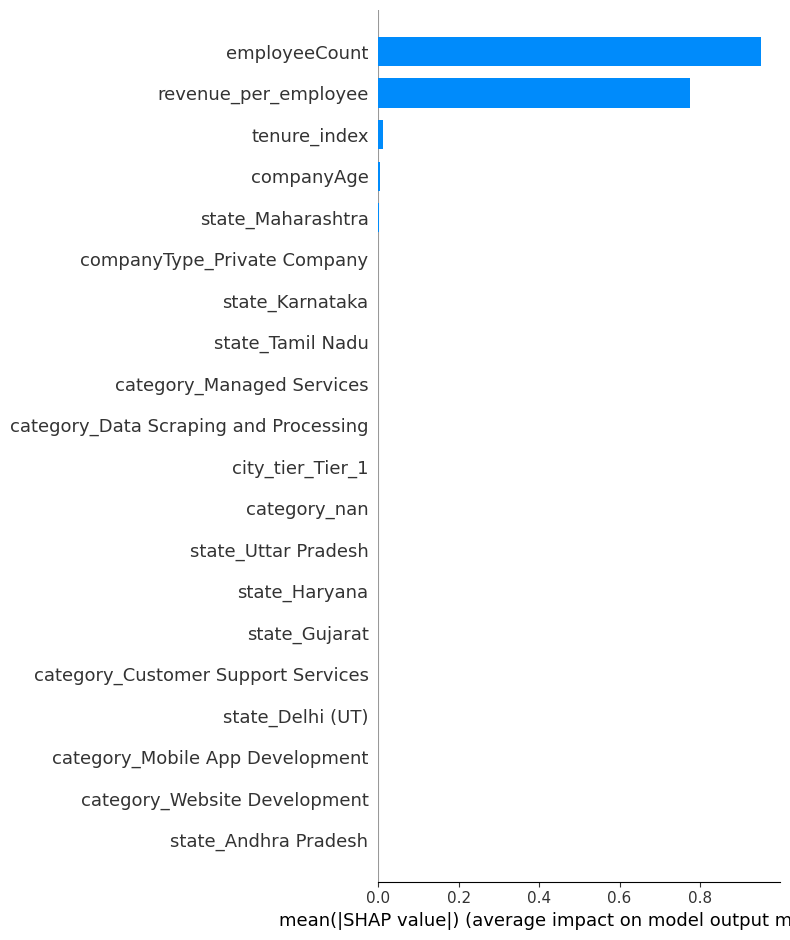

In [30]:
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=feature_names,
    plot_type="bar",
    show=True
)
